In [1]:
import sys
sys.path.insert(0, "../python")
import numpy as np
from gps.algorithm.policy_opt.tf_model_example_multirobot import multitask_multirobot_conv_supervised
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
sess = tf.Session()

In [ ]:
results = list(eval(x) for x in open("taskout-pr2-new.log") if x[:1] == "[" and x[-2:] == "]\n")
obss, taskouts = results[::2], results[1::2]
labels = [[int(x == (n // 100) % 12) for x in range(12)] for n in range(2400)]
vert = [[int(x == (n // 100) % 3) for x in range(3)] for n in range(2400)]
horiz = [[int(x == (n // 300) % 4) for x in range(4)] for n in range(2400)]
len(results)

In [20]:
task_tens = tf.placeholder(tf.float64, [12, None], "task")
actual = tf.placeholder(tf.float64, [12, None], "actual")
def linear_classifier(task_tens):
    classifier = tf.Variable(np.zeros((12, 12)))
    unnorm = tf.matmul(classifier, task_tens)
    prediction = tf.exp(unnorm) / tf.reduce_sum(tf.exp(unnorm), reduction_indices=0)
    return prediction, classifier
def biased_linear_classifier(task_tens):
    classifier = tf.Variable(np.zeros((12, 12)))
    bias = tf.Variable(np.zeros((12, 1)))
    unnorm = tf.matmul(classifier, task_tens) + bias
    prediction = tf.exp(unnorm) / tf.reduce_sum(tf.exp(unnorm), reduction_indices=0)
    sess.run(tf.initialize_all_variables())
    return prediction, (classifier, bias)
def two_layer_nn(task_tens):
    first = tf.Variable(np.random.rand(12, 12), "first")
    first_bias = tf.Variable(np.random.rand(12, 1), "first_bias")
    hidden = tf.nn.relu(tf.matmul(first, task_tens) + first_bias)
    second = tf.Variable(np.random.rand(12, 12), "second")
    second_bias = tf.Variable(np.random.rand(12, 1), "second_bias")
    unnorm = (tf.matmul(second, hidden) + second_bias)
    prediction = tf.exp(unnorm) / tf.reduce_sum(tf.exp(unnorm), reduction_indices=0)
    sess.run(tf.initialize_all_variables())
    return prediction, (first, first_bias, second, second_bias)
def cost_train(task_tens, prediction, alpha):
    cost = tf.nn.l2_loss(prediction - actual)
    train_step = tf.train.GradientDescentOptimizer(alpha).minimize(cost)
    return cost, train_step
def train(classifier, alpha=0.05):
    prediction, model = classifier(task_tens)
    cost, train_step = cost_train(task_tens, prediction, alpha)
    costs = []
    try:
        for i in range(100000):
            sess.run(train_step, feed_dict={task_tens : np.array(taskouts).T, actual : np.array(labels).T})
            costs.append(sess.run(cost, feed_dict={task_tens : np.array(taskouts).T, actual : np.array(labels).T}))
            if i % 10 == 0:
                print "*",
            if i % 100 == 0:
                plt.plot(costs)
                plt.show()
                corrects = [np.argmax(u) == (i // 100) % 12 for i, u in enumerate(sess.run(prediction, feed_dict={task_tens : np.array(taskouts).T}).T)]
                plt.plot([sum(corrects[i * 100 : (i + 1) * 100]) / 100.0 for i in range(24)])
                plt.ylim(0, 1)
                plt.show()
                print sum(corrects) / float(len(corrects))
    except KeyboardInterrupt:
        pass
    return model

In [17]:
sess.run(tf.initialize_all_variables())

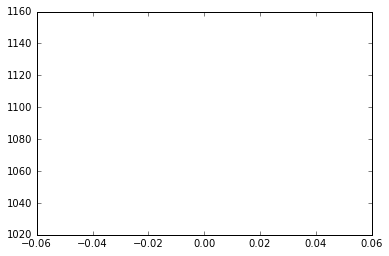

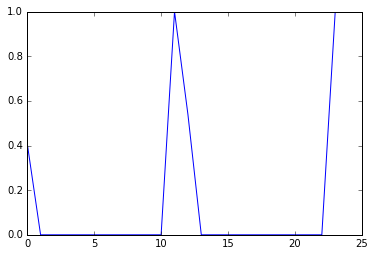

0.122916666667


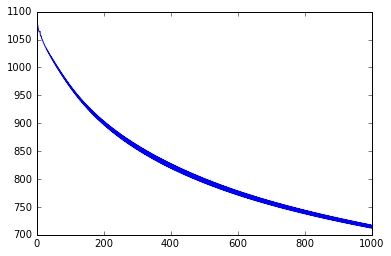

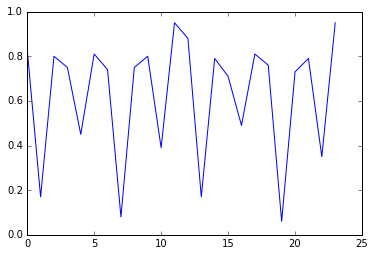

0.625416666667


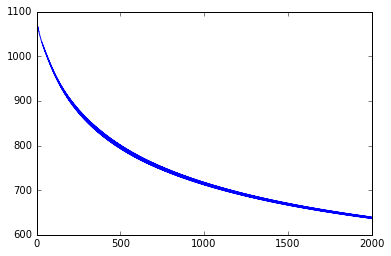

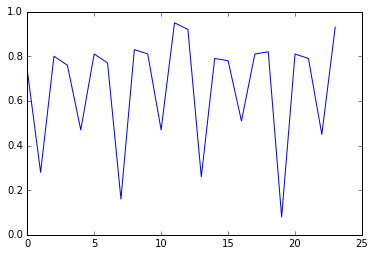

0.658333333333


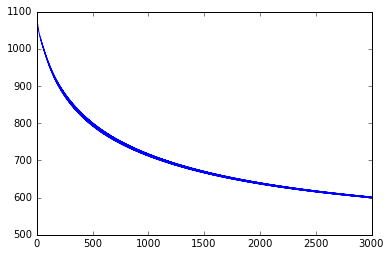

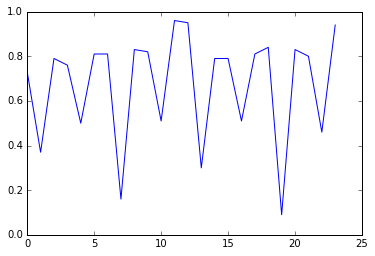

0.673333333333


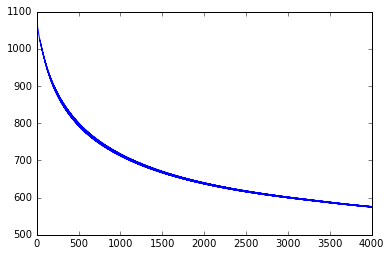

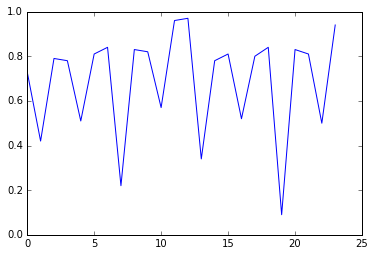

0.687916666667


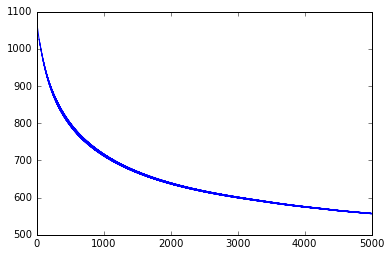

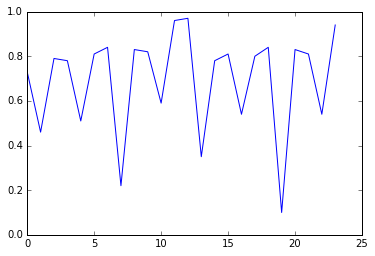

0.69375


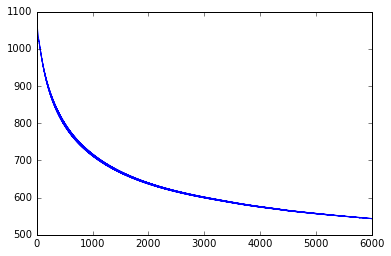

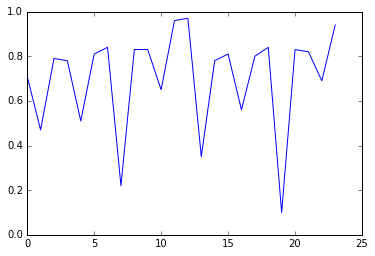

0.70375


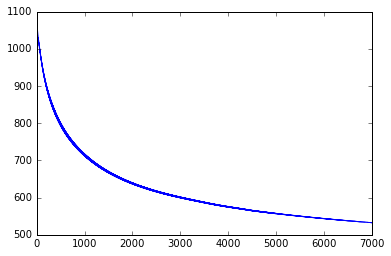

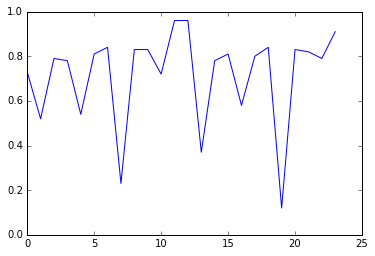

0.71625


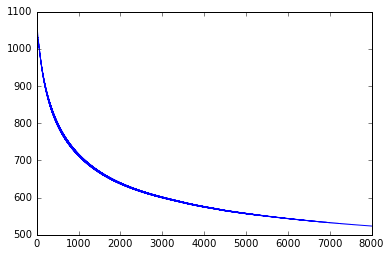

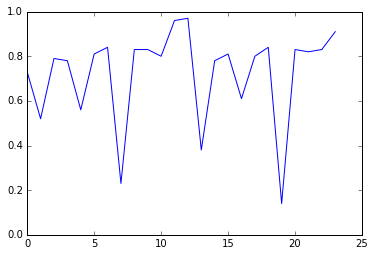

0.725


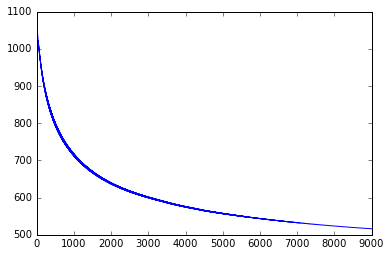

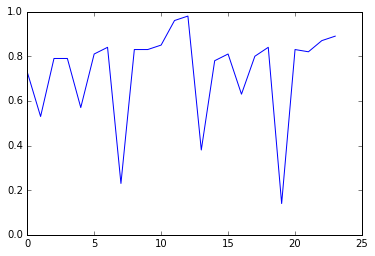

0.730416666667


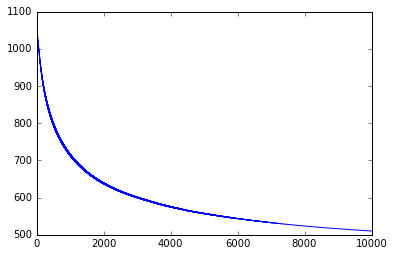

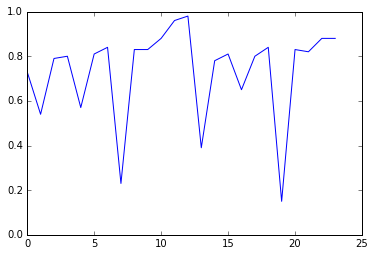

0.734166666667


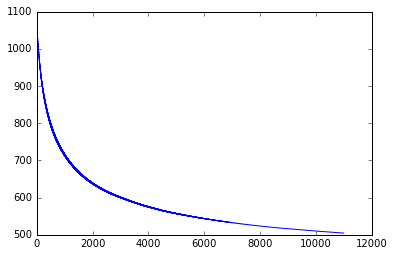

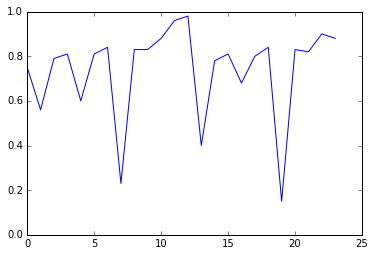

0.74


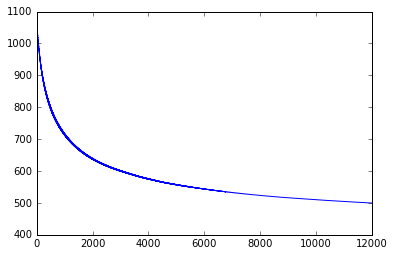

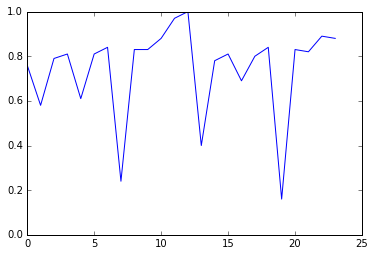

0.74375


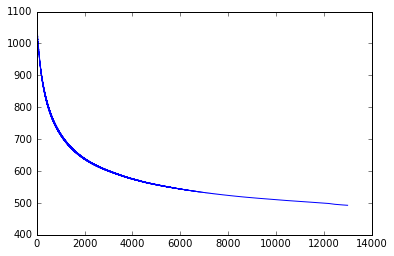

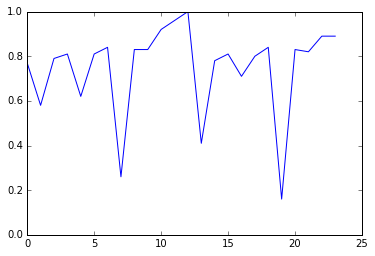

0.748333333333


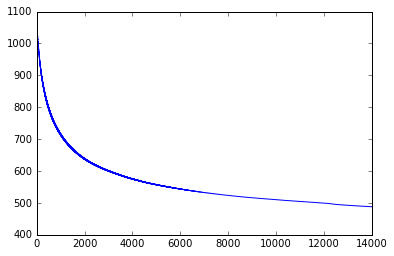

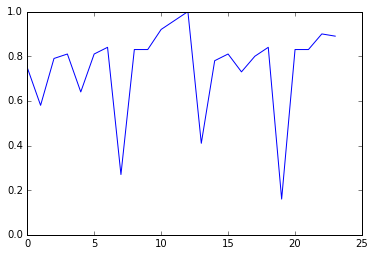

0.750416666667


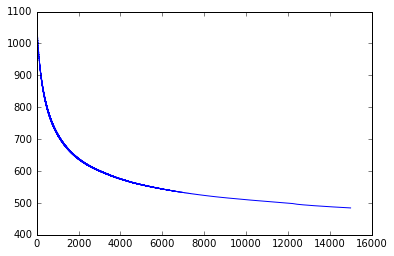

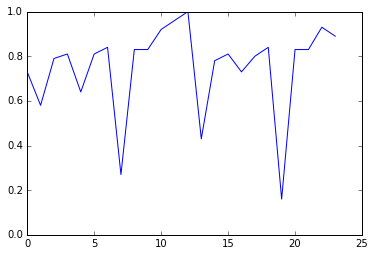

0.751666666667


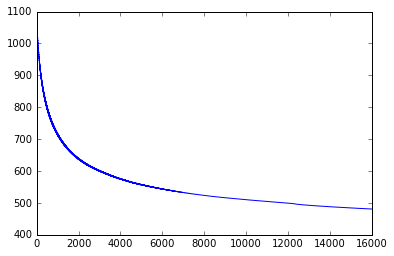

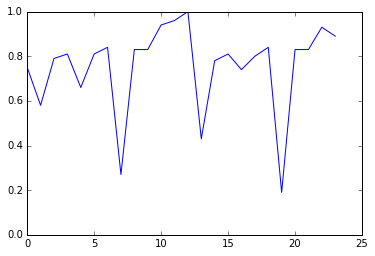

0.755833333333


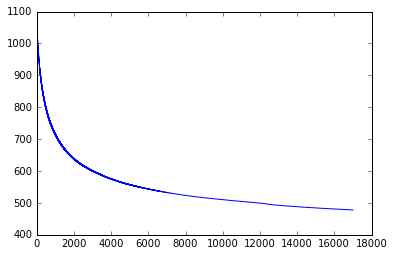

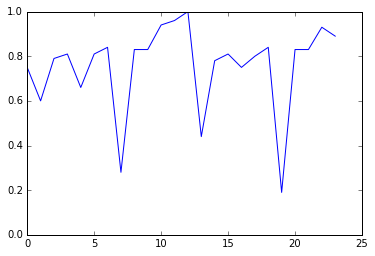

0.757916666667


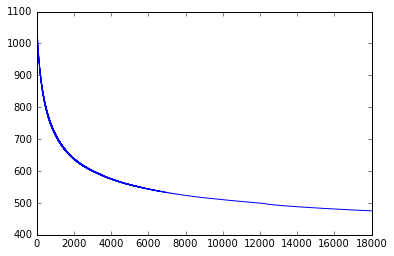

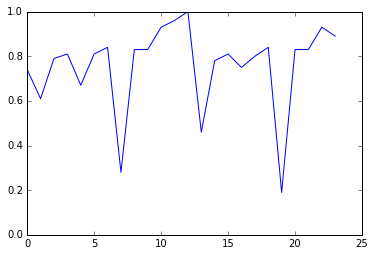

0.75875


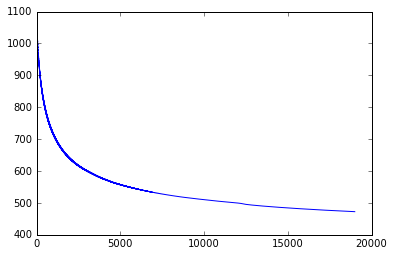

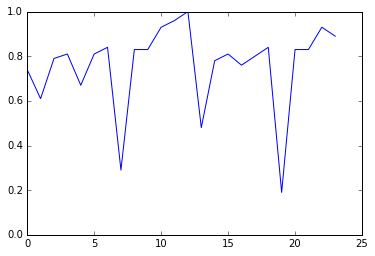

0.760416666667


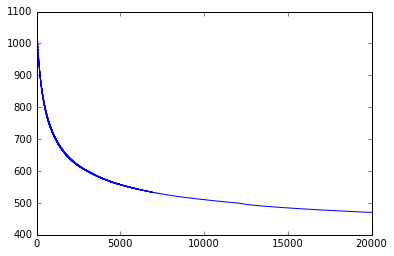

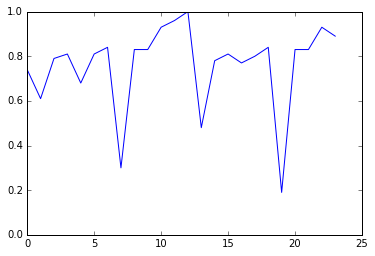

0.761666666667


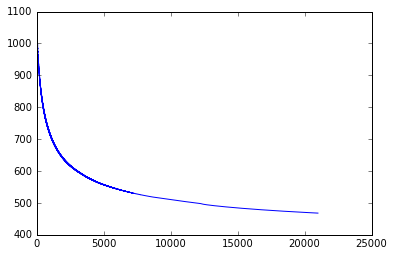

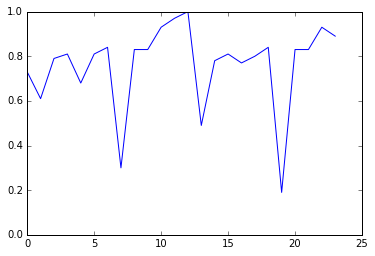

0.762083333333


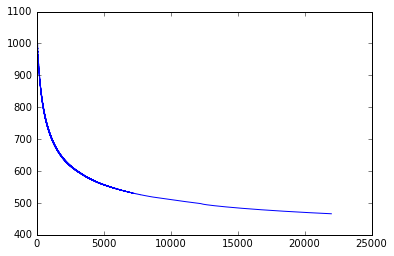

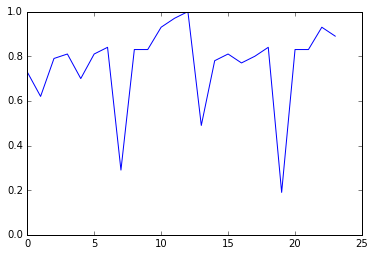

0.762916666667


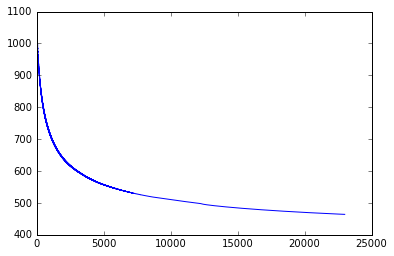

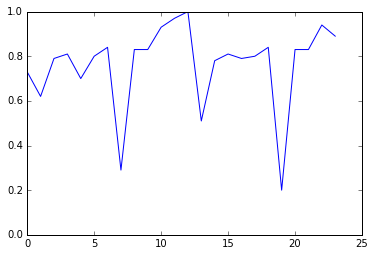

0.765


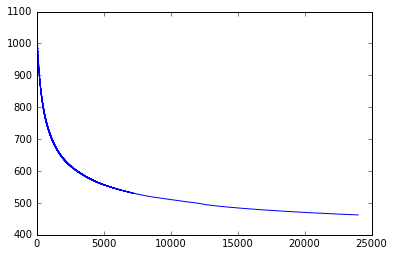

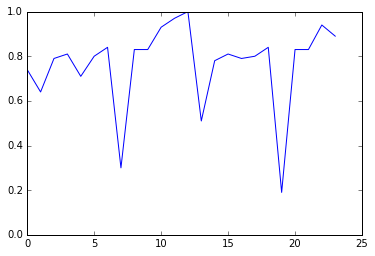

0.766666666667


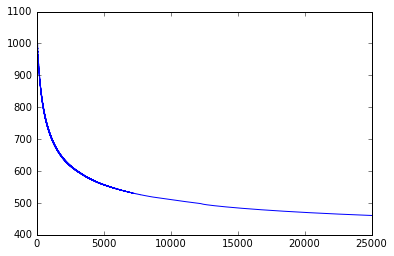

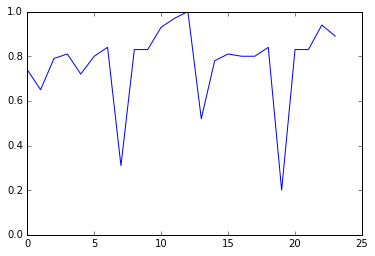

0.769166666667


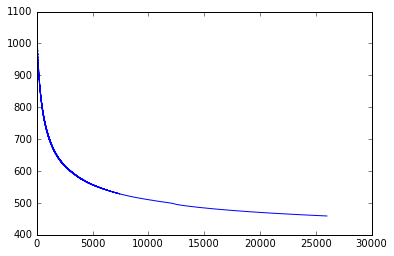

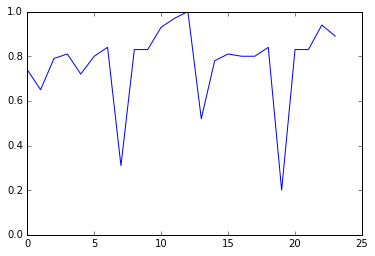

0.769166666667


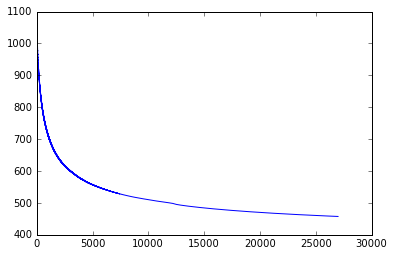

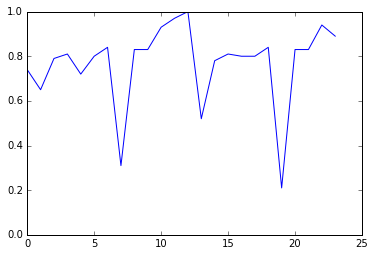

0.769583333333


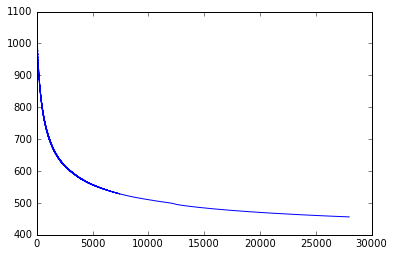

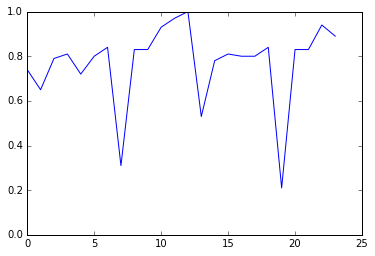

0.77


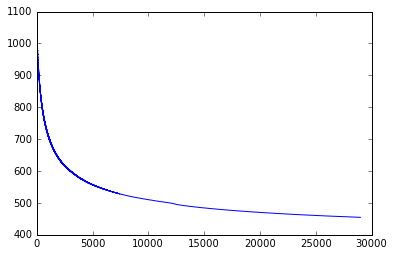

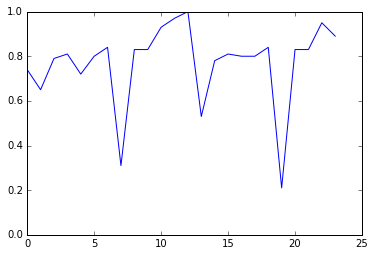

0.770416666667


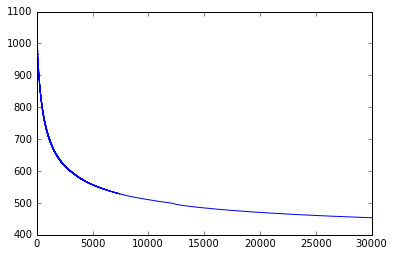

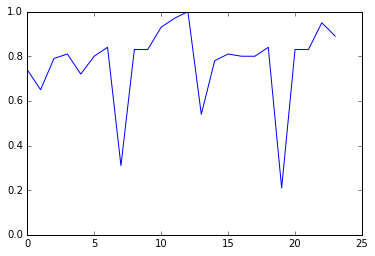

0.770833333333


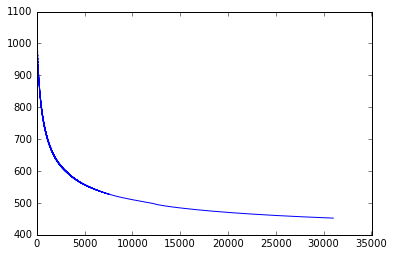

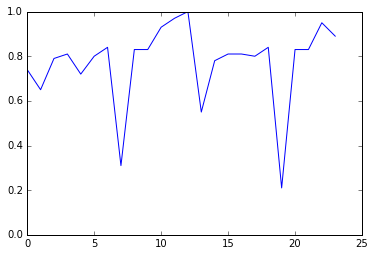

0.771666666667


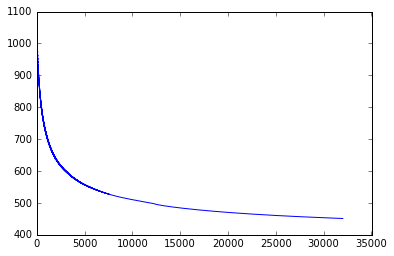

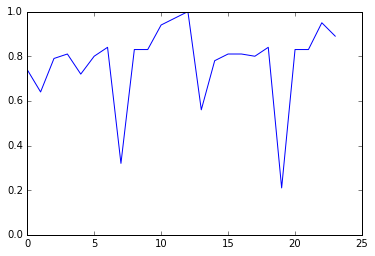

0.7725


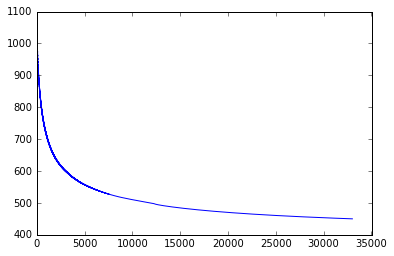

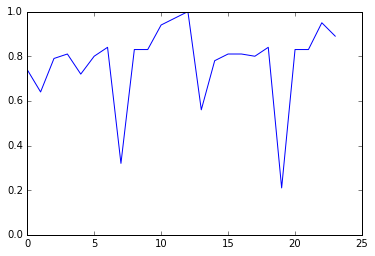

0.7725


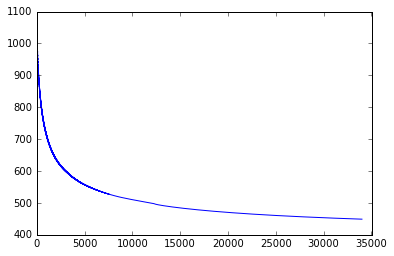

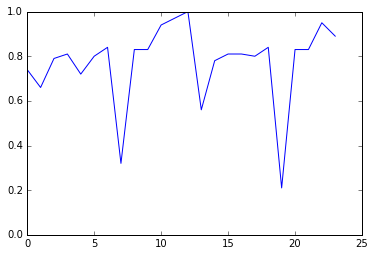

0.773333333333


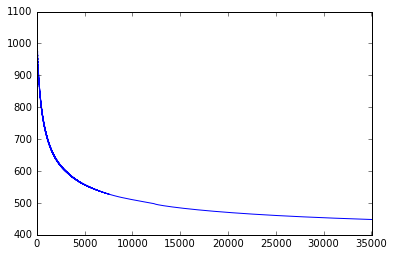

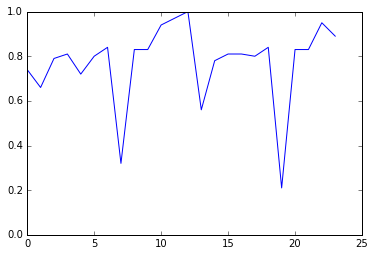

0.773333333333


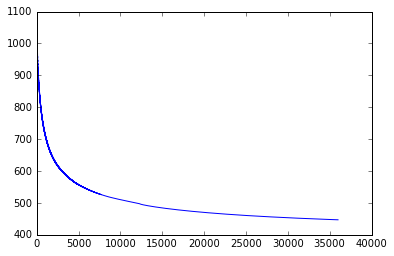

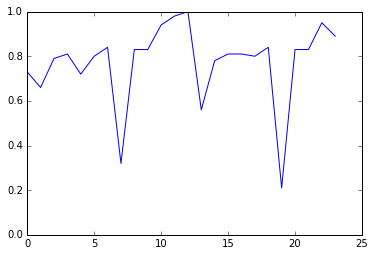

0.773333333333


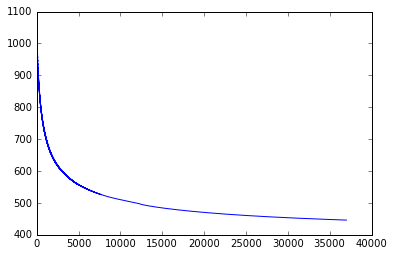

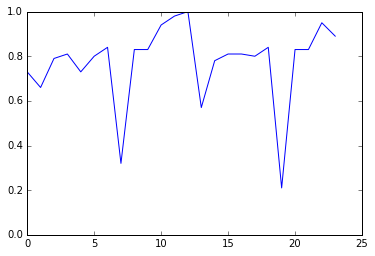

0.774166666667


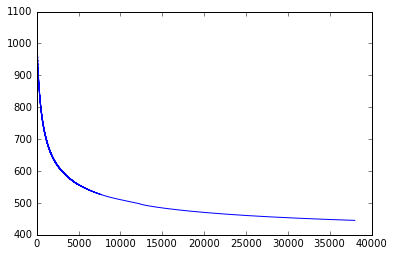

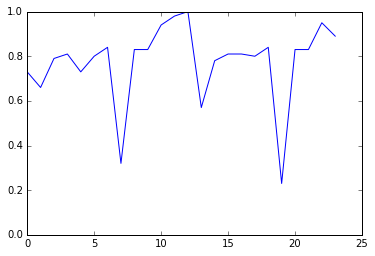

0.775


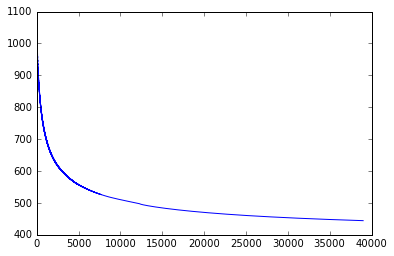

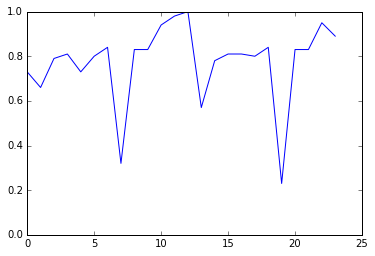

0.775


In [13]:
biased_class, biased_bias = train(biased_linear_classifier, alpha=1e-2)

*

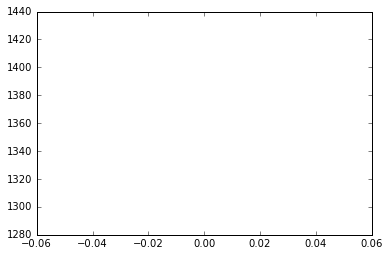

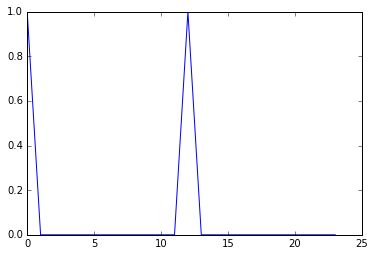

 0.0833333333333
* * * * * * * * * *

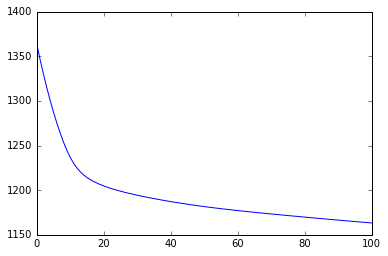

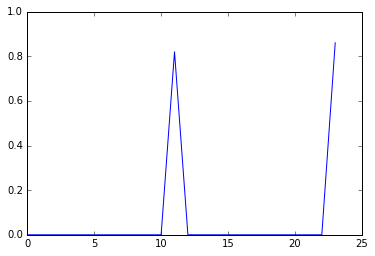

 0.07
* * * * * * * * * *

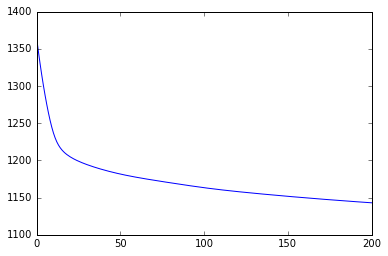

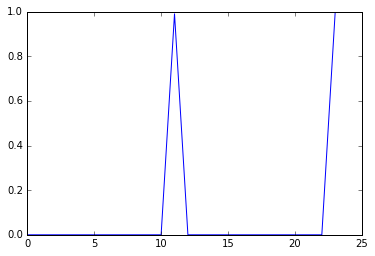

 0.0829166666667
* * * * * * * * * *

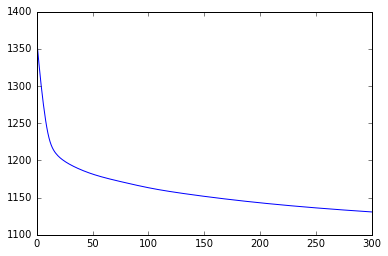

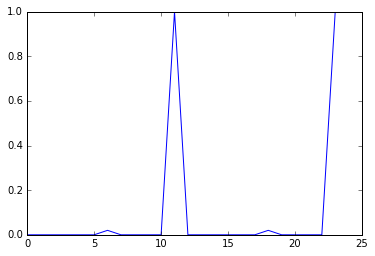

 0.085
* * * * * * * * * *

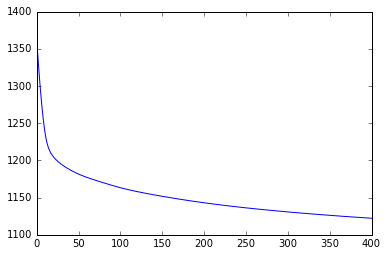

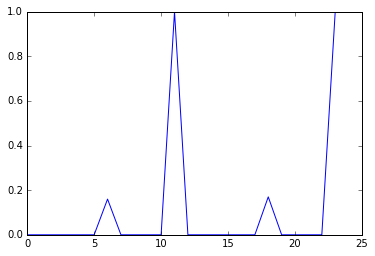

 0.0970833333333
* * * * * * * * * *

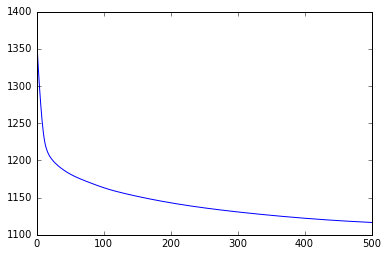

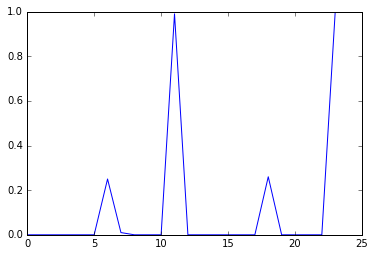

 0.104583333333
* * * * * * * * * *

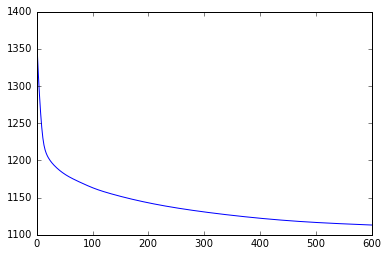

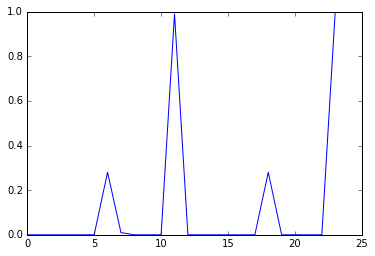

 0.106666666667
* * * * * * * * * *

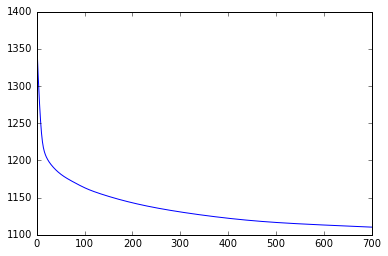

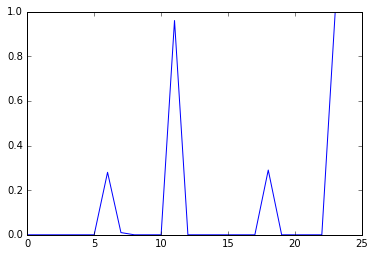

 0.105833333333
* * * * * * * * * *

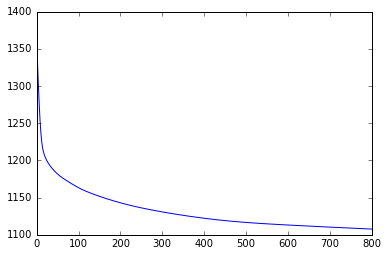

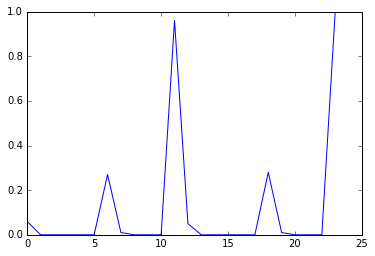

 0.11
* * * * * * * * * *

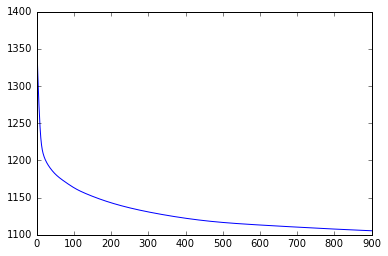

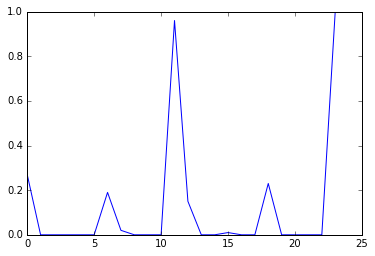

 0.117916666667
* * * * * * * * * *

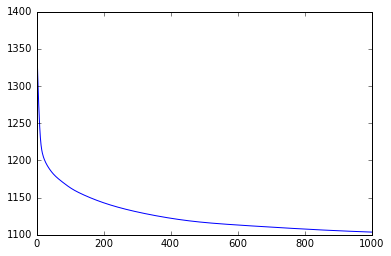

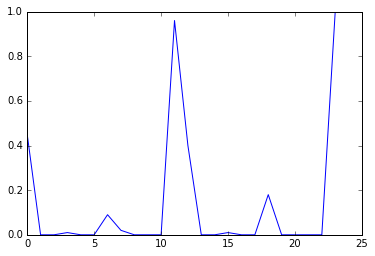

 0.13
* * * * * * * * * *

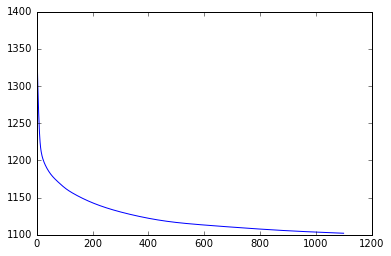

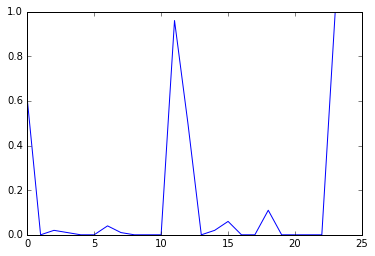

 0.139166666667
* * * * * * * * * *

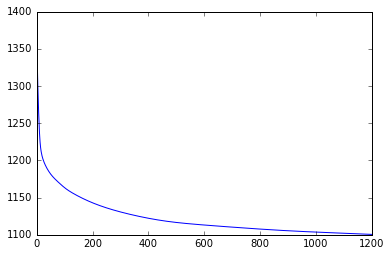

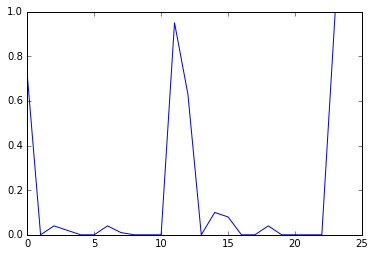

 0.15125
* * * * * * * * * *

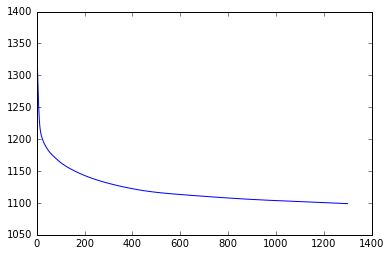

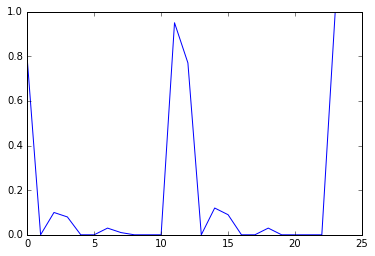

 0.165416666667
* * * * * * * * * *

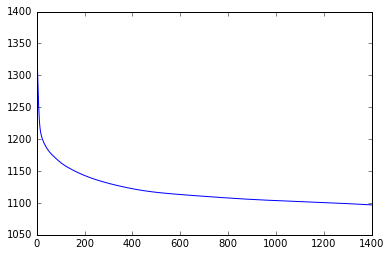

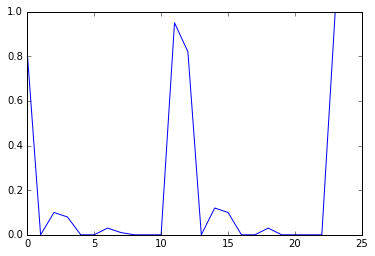

 0.169166666667
* * * * * * * * * *

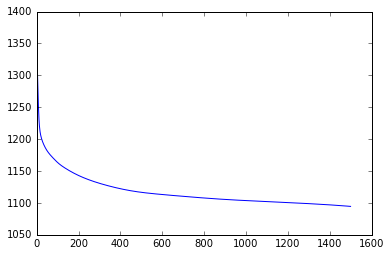

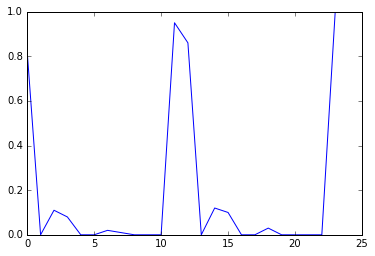

 0.170833333333
* * * * * * * * * *

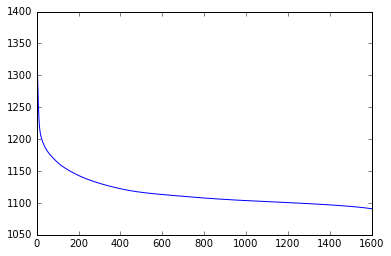

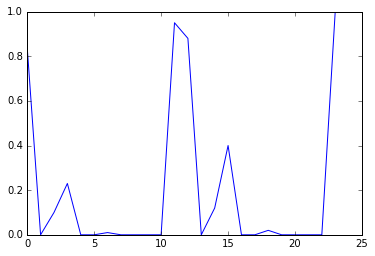

 0.189583333333
* * * * * * * * * *

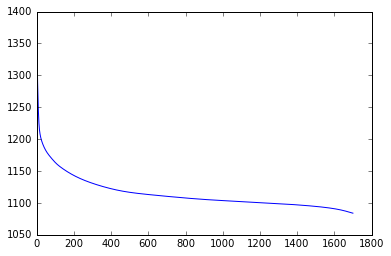

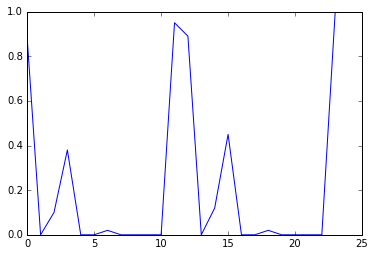

 0.200416666667
* * * * * * * * * *

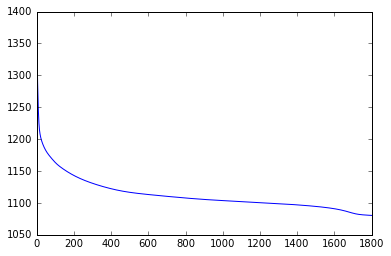

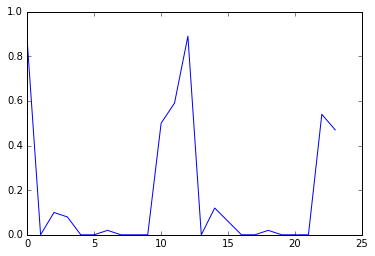

 0.1775
* * * * * * * * * *

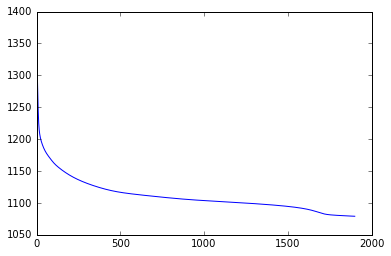

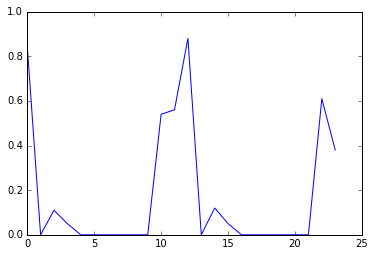

 0.172916666667
* * * * * * * * * *

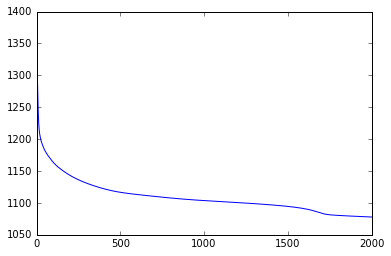

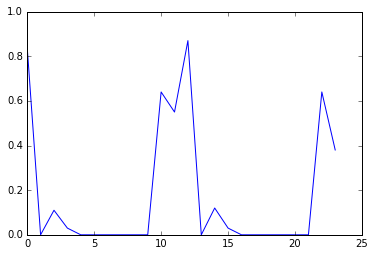

 0.175416666667
* * * * * * * * * *

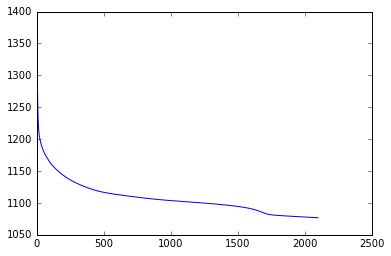

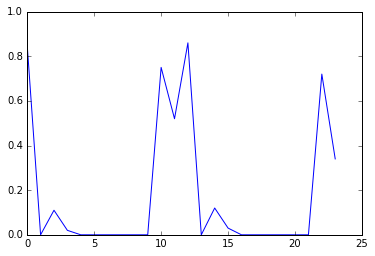

 0.18
* * * * * * * * * *

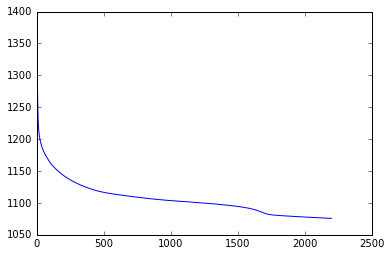

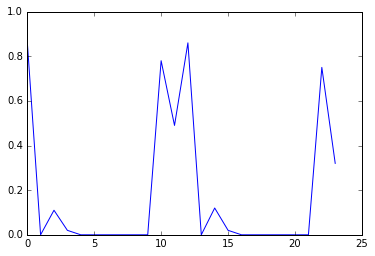

 0.180833333333
* * * * * * * * * *

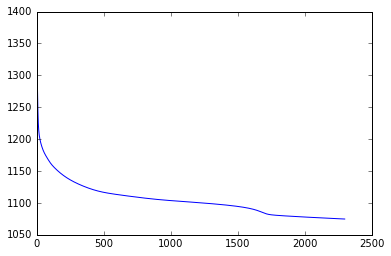

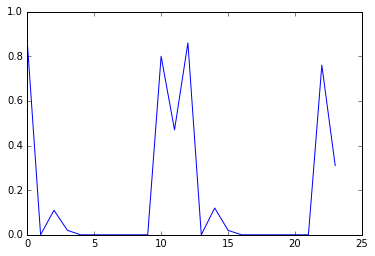

 0.180833333333
* * * * * * * * * *

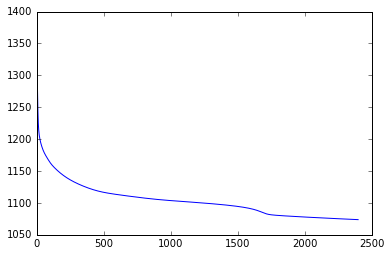

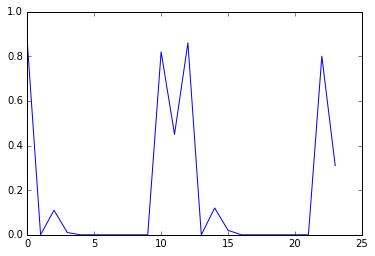

 0.182083333333
* * * * * * * * * *

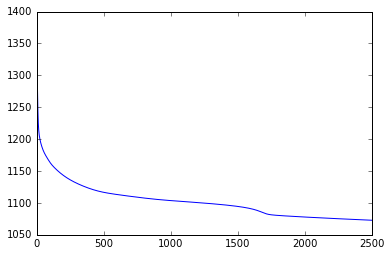

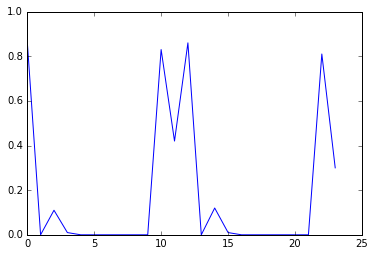

 0.180833333333
* * * * * * * * * *

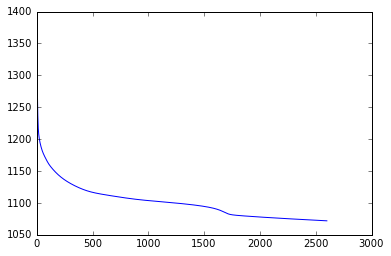

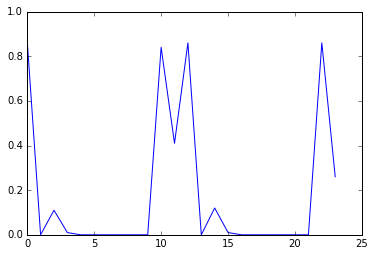

 0.18125
* * * * * * * * * *

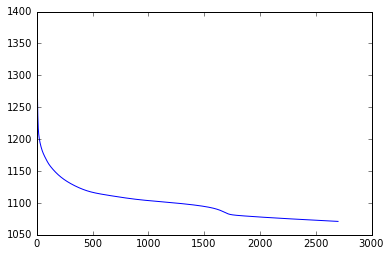

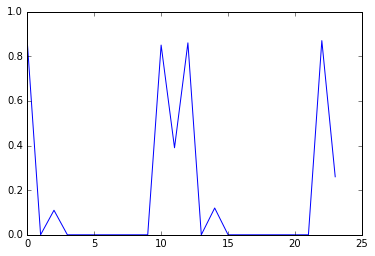

 0.180416666667
* * * * * * * * * *

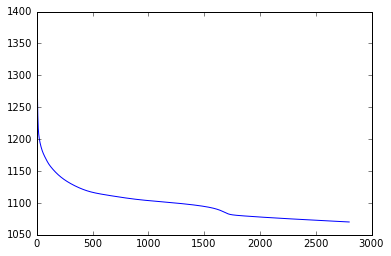

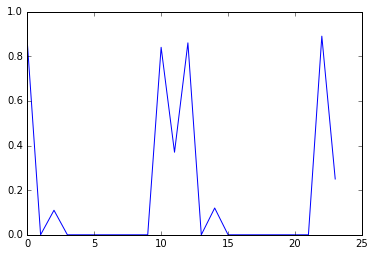

 0.179583333333
* * * * * * * * * *

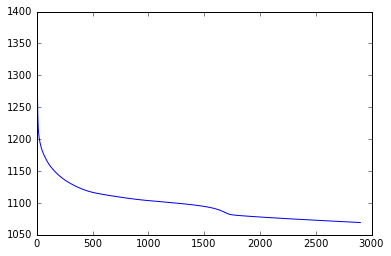

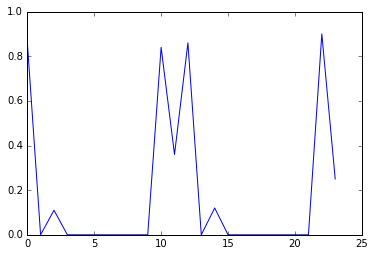

 0.179583333333
* * * * * * * * * *

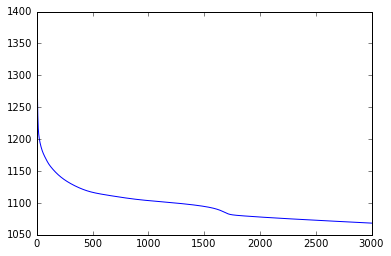

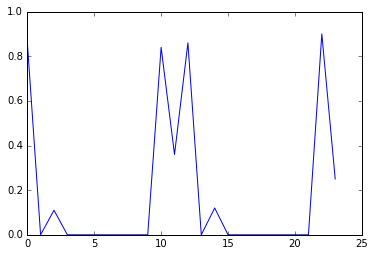

 0.179583333333
* * * * * * * * * *

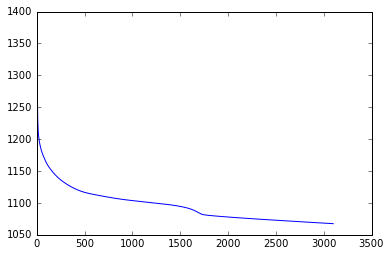

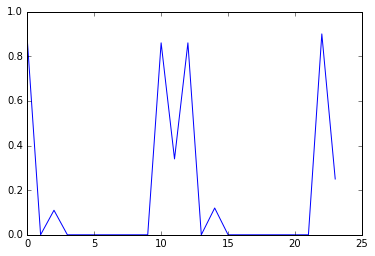

 0.18
* * * * * * * * * *

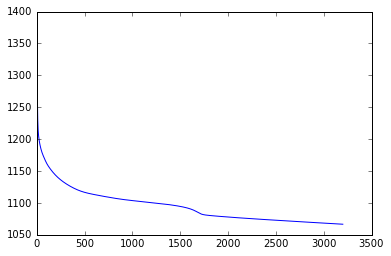

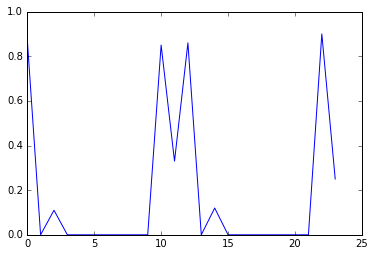

 0.179166666667
* * * * * * * * * *

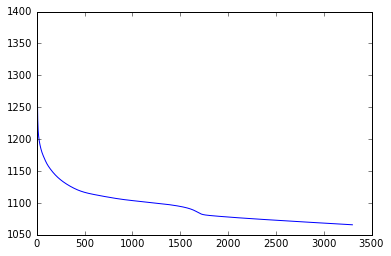

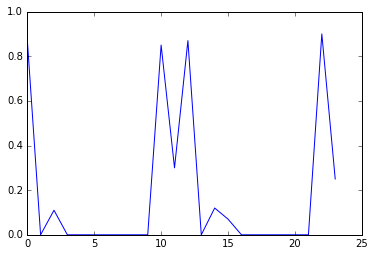

 0.18125
* * * * * * * * * *

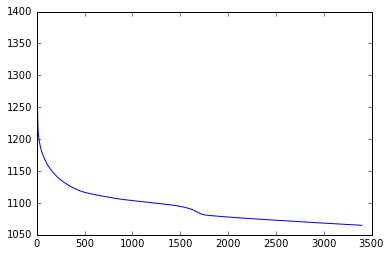

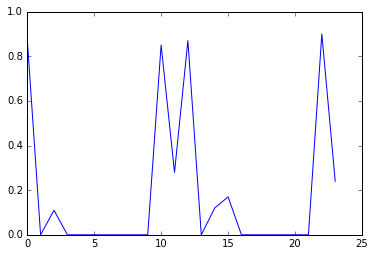

 0.184166666667
* * * * * * * * * *

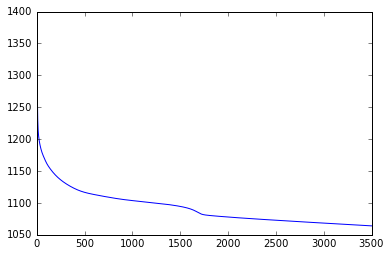

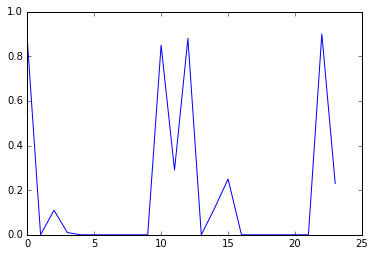

 0.188333333333
* * * * * * * * * *

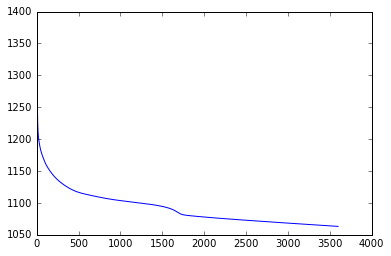

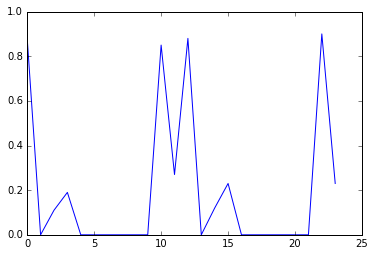

 0.194166666667
* * * * * * * * * *

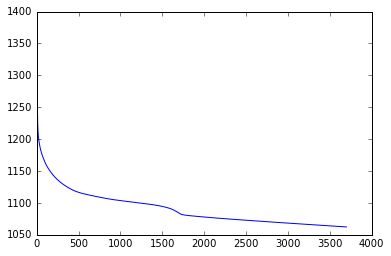

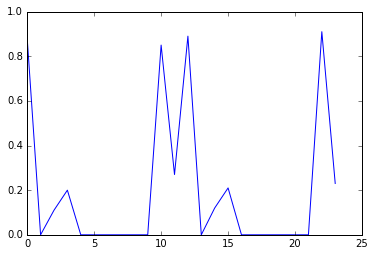

 0.194583333333
* * * * * * * * * *

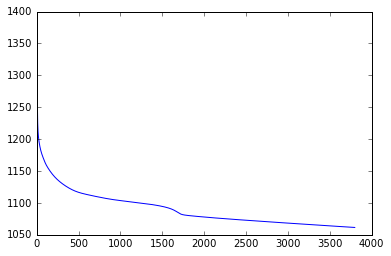

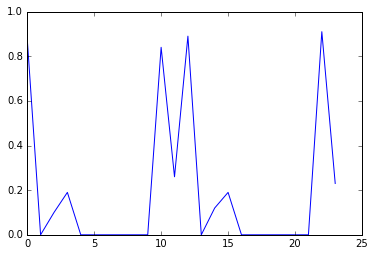

 0.192083333333
* * * * * * * * * *

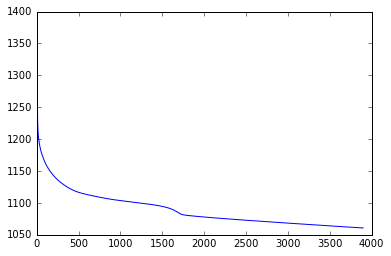

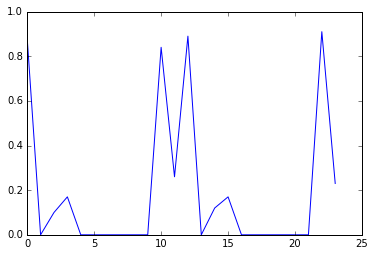

 0.190416666667
* * * * * * * * * *

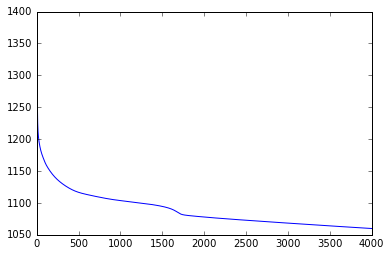

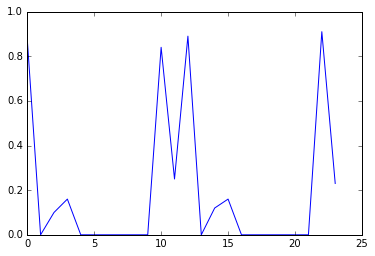

 0.189166666667
* * * * * * * * * *

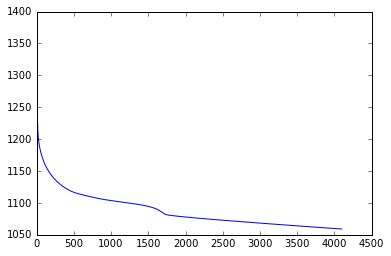

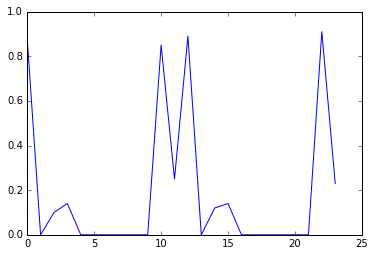

 0.187916666667
* * * * * * * * * *

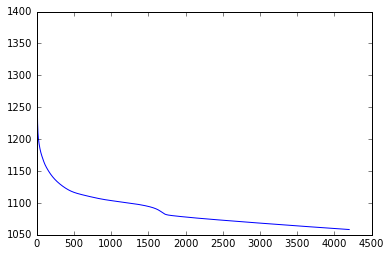

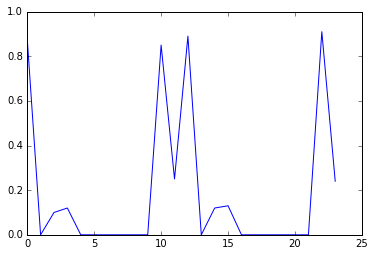

 0.187083333333
* * * * * * * * * *

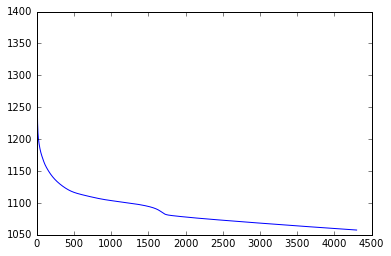

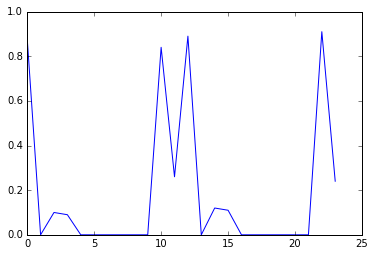

 0.185
* * * * * * * * * *

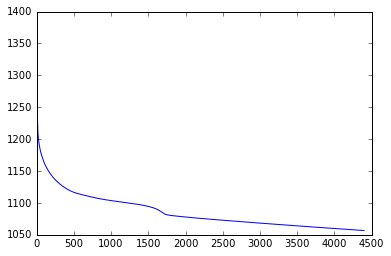

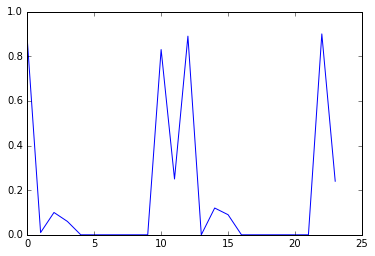

 0.182083333333
* * * * * * * * * *

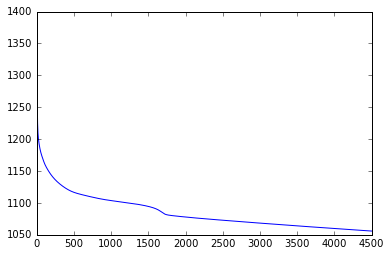

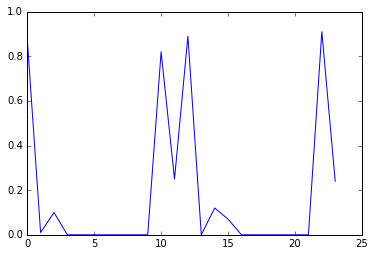

 0.17875
* * * * * * * * * *

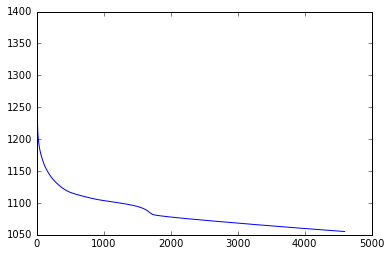

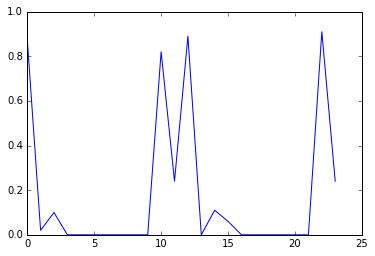

 0.177916666667
* * * * * * * * * *

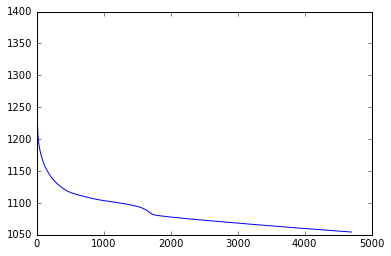

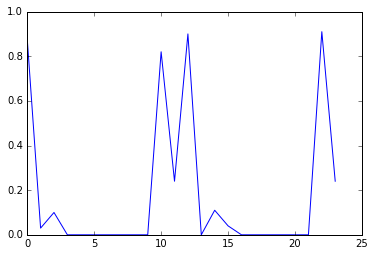

 0.177916666667
* * * * * * * * * *

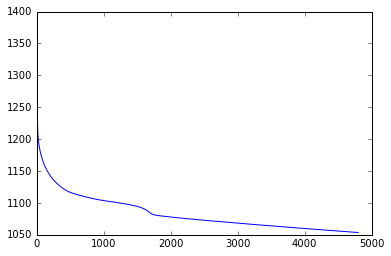

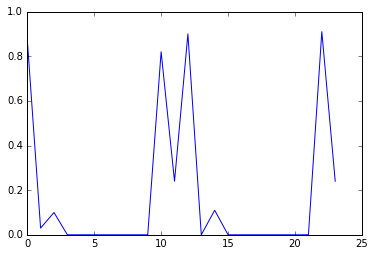

 0.17625
* * * * * * * * * *

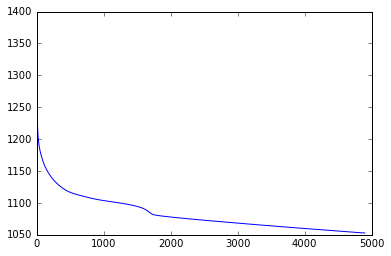

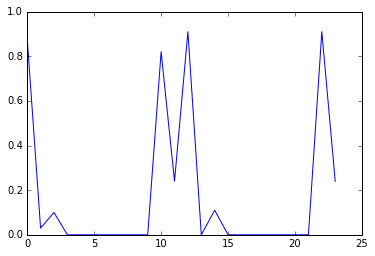

 0.176666666667
* * * * * * * * * *

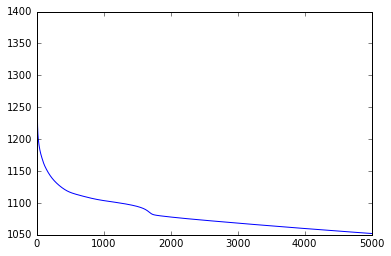

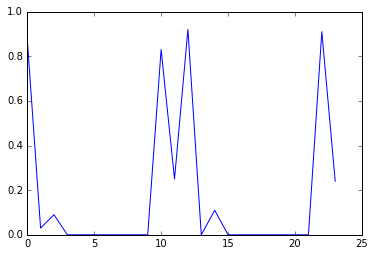

 0.1775
* * * * * * * * * *

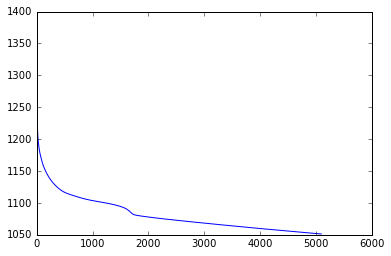

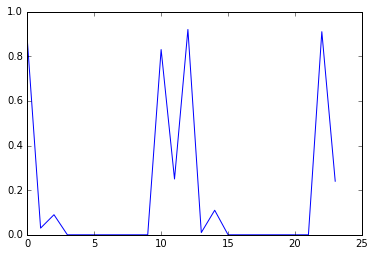

 0.177916666667
* * * * * * * * * *

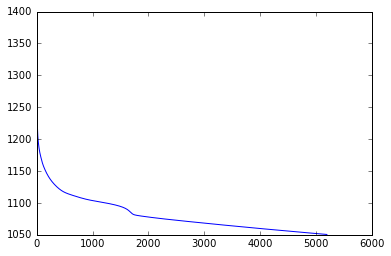

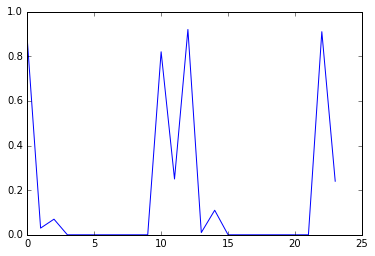

 0.176666666667
* * * * * * * * * *

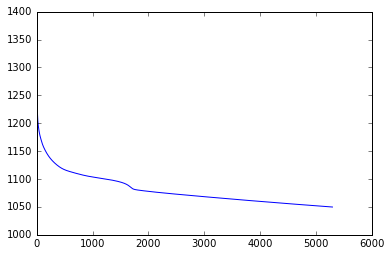

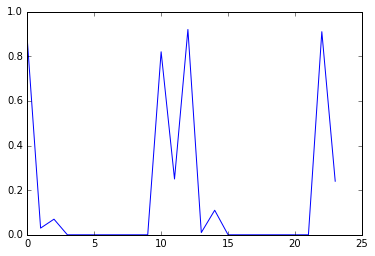

 0.176666666667
* * * * * * * * * *

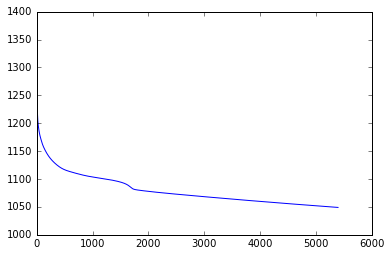

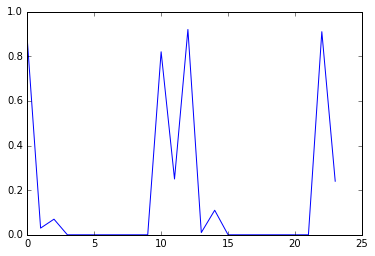

 0.176666666667
* * * * * * * * * *

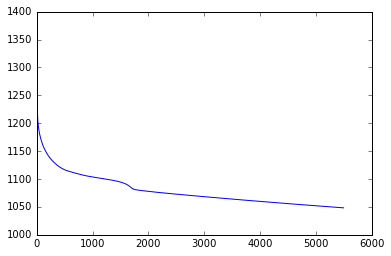

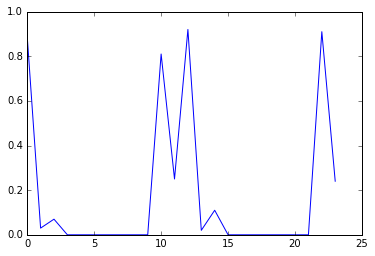

 0.177083333333
* * * * * * * * * *

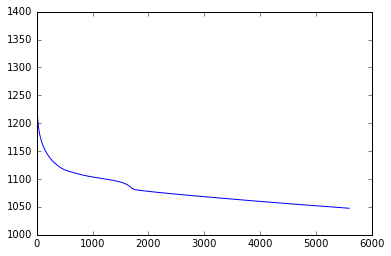

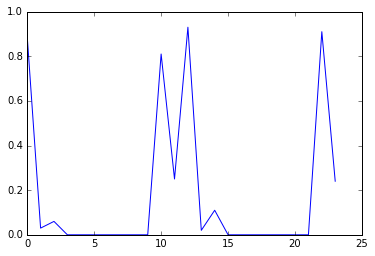

 0.177083333333
* * * * * * * * * *

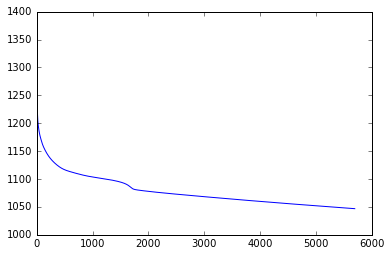

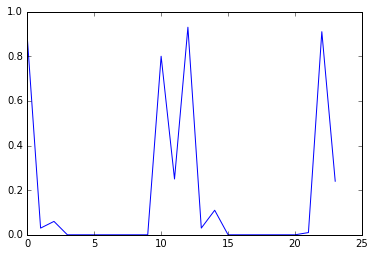

 0.1775
* * * * * * * * * *

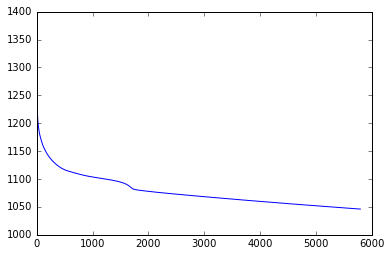

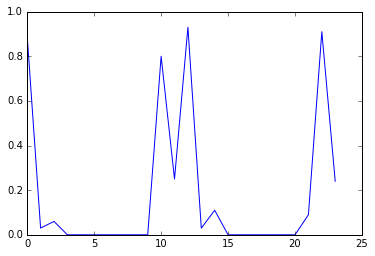

 0.180833333333
* * * * * * * * * *

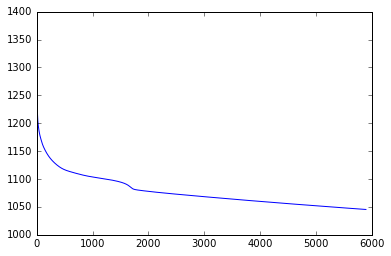

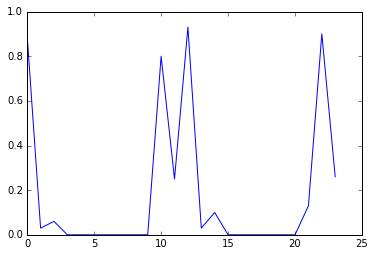

 0.1825
* * * * * *

In [ ]:
nn_2 = train(two_layer_nn, alpha=1e-5)

In [ ]:
original_place = tf.placeholder
def placeholder(*args, **kwargs):
    print "Placeholder", args, kwargs
    return original_place(*args, **kwargs)
tf.placeholder = placeholder

In [6]:
kwargs = {'dim_output': [7], 'dim_input': [44], 'network_config': {'robot_list': [0], 'agent_params': [{'dim_hidden': [10], 'obs_include': [1, 2, 3, 4], 'obs_image_data': [], 'num_filters': [10, 20], 'dim_output': 7, 'dim_robot_specific': 44, 'task_specific_idx': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], 'sensor_dims': {0: 7, 1: 7, 2: 7, 3: 15, 4: 15}, 'batch_size': 25, 'robot_specific_idx': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]}], 'task_list': [0]}, 'batch_size': 25}
tf_maps, robot_vars, task_vars, av, ls = multitask_multirobot_conv_supervised(use_image=False, is_testing=True, **kwargs)

making multi-input/output-network
Placeholder (tf.float32,) {}
agent 0
Placeholder ('float', [None, 6]) {'name': 'ee_input0'}
Placeholder ('float', [None, 44]) {'name': 'nn_input0'}
Placeholder ('float', [None, 7]) {'name': 'action0'}
Placeholder ('float', [None, 7, 7]) {'name': 'precision0'}
[14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43] !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
task 0 robot 0


In [7]:
obs_tensor = tf_maps[0].input_tensor
act_op = tf_maps[0].target_output_tensor

In [8]:
for k,v in av.items():
    if k in val_vars:
        print(k)
        assign_op = v.assign(val_vars[k])
        sess.run(assign_op)

bout_rn_0
w4_rn_0
b5_rn_0
w3_tn_0
taskout_tn_0
b3_tn_0
b4_rn_0
task_weights_tn_0
taskout_b_tn_0
wout_rn_0
w5_rn_0


In [31]:
def taskout(obs):
    return sess.run(act_op, feed_dict={
        obs_tensor : obs,
        ls["keep_prob"][0] : 1.0,
        ls["ee_input"][0] : np.zeros((1, 6)),
    })

In [32]:
taskout([results[0]])

InvalidArgumentError: You must feed a value for placeholder tensor 'action0' with dtype float
	 [[Node: action0 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op u'action0', defined at:
  File "/home/kavi/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/kavi/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 433, in _handle_events
    self._handle_recv()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 465, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/kavi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-37571cd00e67>", line 2, in <module>
    tf_maps, robot_vars, task_vars, av, ls = multitask_multirobot_conv_supervised(use_image=False, is_testing=True, **kwargs)
  File "../python/gps/algorithm/policy_opt/tf_model_example_multirobot.py", line 1457, in multitask_multirobot_conv_supervised
    nn_input, action, precision = get_input_layer(dim_input[agent_number], dim_output[agent_number], agent_number)
  File "../python/gps/algorithm/policy_opt/tf_model_example_multirobot.py", line 74, in get_input_layer
    action = tf.placeholder('float', [None, dim_output], name='action' + str(robot_number))
  File "<ipython-input-2-1224697dfaf9>", line 4, in placeholder
    return original_place(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1274, in placeholder
    name=name)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1522, in _placeholder
    name=name)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2310, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()


In [111]:
ls['task_output'][0]

<tf.Tensor 'Relu_9:0' shape=(?, 12) dtype=float32>

In [120]:
lin_class = tf.Variable(np.zeros((12, 12)), dtype="float")

In [121]:
taskout_tensor = tf.placeholder(tf.float32, shape=(12, 1))

In [122]:
guessed_class = tf.nn.softmax(tf.matmul(lin_class, taskout_tensor))

In [12]:
taskout([results[0]])

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]
Caused by op u'Placeholder', defined at:
  File "/home/kavi/anaconda/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/kavi/anaconda/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 433, in _handle_events
    self._handle_recv()
  File "/home/kavi/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 465, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/kavi/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-6-37571cd00e67>", line 2, in <module>
    tf_maps, robot_vars, task_vars, av, ls = multitask_multirobot_conv_supervised(use_image=False, is_testing=True, **kwargs)
  File "../python/gps/algorithm/policy_opt/tf_model_example_multirobot.py", line 1387, in multitask_multirobot_conv_supervised
    keep_prob = tf.placeholder(tf.float32)
  File "<ipython-input-2-1224697dfaf9>", line 4, in placeholder
    return original_place(*args, **kwargs)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/array_ops.py", line 1274, in placeholder
    name=name)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1522, in _placeholder
    name=name)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/op_def_library.py", line 703, in apply_op
    op_def=op_def)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 2310, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/home/kavi/anaconda/lib/python2.7/site-packages/tensorflow/python/framework/ops.py", line 1232, in __init__
    self._traceback = _extract_stack()
